**HW 3**    
  
Friday 02/14/2025  
DS 3001 Spring 2025  
Teresa Duong  

**Problem 1: Frequentist hypothesis testing**

Dataset: Suppose you are given a dataset from an online experiment where two versions of a webpage (A and B) were tested. The dataset contains the number of visitors and the number of conversions (successful sign-ups) for each version.

Version A: 5000 visitors, 150 conversions.
Version B: 5000 visitors, 180 conversions.

Task:

Create a null hypothesis suitable for this example. <br>
Perform a two-tailed z-test for proportions to determine if the conversion rate for version B is significantly higher than version A. Use a significance level of 0.05.<br>
Calculate the z-statistic, p-value, and interpret the result.<br>
Repeat the same for a one-tailed z-test. Compare the two.

<font color = "blue">
Null hypothesis (H0): The version of the webpage (A or B) has no influence on its conversion rate.
<font/>

In [2]:
import math
from scipy import stats

significance_level = 0.05 # probability of a false positive; when the probability reaches this level, we reject the null hypothesis, and the difference is significant

visitors_A = 5000
conversions_A = 150
visitors_B = 5000
conversions_B = 180

# Conversion rates (conversion / total visitors)
p_A = conversions_A / visitors_A
p_B = conversions_B / visitors_B

# Z-test for Proportions: https://courses.lumenlearning.com/suny-hccc-wm-concepts-statistics/chapter/hypothesis-test-for-difference-in-two-population-proportions-3-of-6/
# z statistic = (pooled population B - pooled population B) / standard error
pooled_p = (conversions_A + conversions_B) / (visitors_A + visitors_B)
standard_error = math.sqrt(pooled_p * (1 - pooled_p) * (1/visitors_A + 1/visitors_B))
z_statistic = (p_B - p_A) / standard_error

# Calculating the p-value for two-tailed test
# https://www.statology.org/two-proportion-z-test/
# https://www.graphpad.com/guides/prism/latest/statistics/one-tail_vs__two-tail_p_values.htm
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

# Calculating the p-value for one-tailed test
# https://www.tutorialspoint.com/statistics/one_proportion_z_test.htm#:~:text=Statistics%20%2D%20One%20Proportion%20Z%20Test,-Previous&text=The%20test%20statistic%20is%20a,deviation%20of%20the%20sampling%20distribution.
p_value_one_tailed = 1 - stats.norm.cdf(z_statistic)


print("Two-Tailed Test:")
print("Z-Statistic =", z_statistic)
print("P-Value =", p_value_two_tailed)
if p_value_two_tailed < significance_level:
    print("Reject the null hypothesis. There is a significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in conversion rates.")
print("\nOne-Tailed Test:")
print("Z-Statistic =", z_statistic)
print("P-Value =", p_value_one_tailed)
if p_value_one_tailed < significance_level:
    print("Reject the null hypothesis. There is a significant increase in conversion rate for version B.")
else:
    print("Fail to reject the null hypothesis. There is no significant increase in conversion rate for version B.")

Two-Tailed Test:
Z-Statistic = 1.6793880081678563
P-Value = 0.09307644886114153
Fail to reject the null hypothesis. There is no significant difference in conversion rates.

One-Tailed Test:
Z-Statistic = 1.6793880081678563
P-Value = 0.04653822443057076
Reject the null hypothesis. There is a significant increase in conversion rate for version B.


<font color = "blue">
The comparison of the p-values of the two-tailed z-test and the one-tailed z-test showed a higher p-value when using the two-tailed test. This p-value was higher than our threshold for significance 0.05, so it caused us to conclude version B does not have a significantly higher conversion rate than version A. 
<font/>

**Problem 2: Bayesian hypothesis testing**
Dataset: Use the same dataset as above.

Task:

Implement a Bayesian hypothesis test to determine if the conversion rate for version B is significantly higher than version A. <br>
Using MCMC or another sampling method, draw samples from the posterior distribution of each version’s conversion rate.<br>
Calculate the probability that version B is better than version A.<br>
Visualize your results.

In [3]:
# Lecture 7 (Bayesianism)

# To determine the probability that B is greater than A, we use the Monte Carlo method
# ○ Choose some number of repetitions n
# ○ Sample from both posteriors n times
# ○ Pair the n repetitions by index
# ○ Measure the proportion of pairs where the sample from B is greater than the sample from A

import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

visitors_A = 5000
conversions_A = 150
visitors_B = 5000
conversions_B = 180

# Bayesian Hypothesis Testing: https://www.pymc.io/projects/examples/en/latest/causal_inference/bayesian_ab_testing_introduction.html
with pm.Model() as model:
    # Beta(sA + 1, fA + 1) and Beta(sB + 1, fB + 1)  (Lecture 7)
    # successes = conversions; failures = visitors - conversions
    p_A = pm.Beta('p_A', alpha=conversions_A + 1, beta=visitors_A - conversions_A + 1)
    p_B = pm.Beta('p_B', alpha=conversions_B + 1, beta=visitors_B - conversions_B + 1)
    
    # Likelihood of observed conversions modeled by binomial distributions
    y_A = pm.Binomial('y_A', n=visitors_A, p=p_A, observed=conversions_A)
    y_B = pm.Binomial('y_B', n=visitors_B, p=p_B, observed=conversions_B)
    
    # Drawing samples from posterior distributions, n = 2000 samples
    MCMC = pm.sample(2000, tune=1000, return_inferencedata=False)

# Monte Carlo method to determine the probability that B is better than A
n = 2000  # Number of repetitions
samples_p_A = MCMC['p_A'][:n]
samples_p_B = MCMC['p_B'][:n]

# Measure the proportion of pairs where the sample from B is greater than the sample from A
prob_B_better = np.mean(samples_p_B > samples_p_A)
print("Probability that version B is better than version A:", prob_B_better)

# Visualization of the posterior distributions
pm.plot_posterior(MCMC, var_names=['p_A', 'p_B'])
plt.show()

# According to this Bayesian hypothesis test, the conversion rate for version B is significantly higher than version A.
# The probability that version B is better than version A is 0.9935.

ModuleNotFoundError: No module named 'pymc3'

**Problem 3: Logistic regression (classification)**

Dataset: Use the dataset found in Canvas' File section ("hw3.jsonl").

Task:

Use logistic regression to build a classification model that predicts the target variable based on the features in the dataset. Use the full dataset at first. <br>
Then, perform 100-fold validation (80/20 train/test split) and report the accuracy, precision, recall, and F1-score of the model. Visualize and interpret your results. <br>
Visualize the decision boundary.

In [ ]:
# Converting JSON to CSV Help: https://www.geeksforgeeks.org/convert-json-to-csv-in-python/
import json
import csv

# Open the JSON Lines file
with open('HW3.jsonl', 'r') as json_file:
    with open('HW3.csv', 'w', newline='') as data_file:
        csv_writer = csv.writer(data_file)
        count = 0
        for line in json_file:
            data = json.loads(line)
            if count == 0:
                header = data.keys()
                csv_writer.writerow(header)
                count += 1
            csv_writer.writerow(data.values())

# Convert CSV to pandas df
import pandas as pd
df = pd.read_csv('HW3.csv')
display (df)
x = df['x']
y = df['y']
# Exploratory scatter plot of the df
plt.scatter(x, y , c=df['l'], cmap='viridis', alpha = 0.2)
plt.title('Test Scatter Plot')
plt.show()
plt.close()

,x,y,l
0,0.272207,0.672364,0
1,0.031941,2.272835,0
2,0.871286,-0.105992,0
3,1.252878,1.101521,0
4,1.884091,2.294689,0
...,...,...,...
1995,4.983404,5.559882,1
1996,4.330200,3.556687,1
1997,3.909910,3.406020,1
1998,2.474143,2.443570,1


NameError: name 'plt' is not defined

Accuracy = 0.905
Precision = 0.9154228855721394
Recall = 0.8975609756097561
F1-Score = 0.9064039408866995


c:\Users\13012\DS3001\DUONG_HW3\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


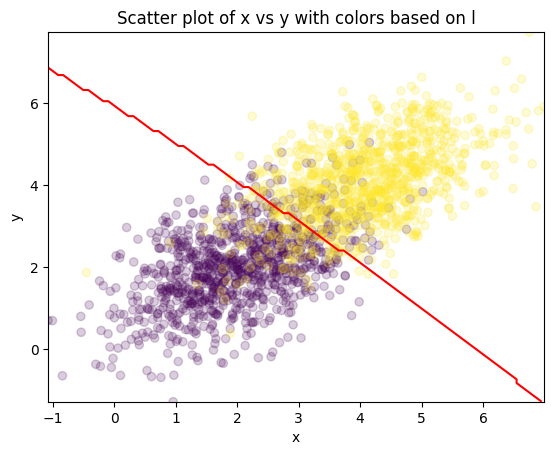

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Classification Model
# I referenced my intro programming coursework for this task: https://github.com/phys1655/class23-zqw3cm/blob/main/class23.ipynb
x = df[['x', 'y']]  # Features
y = df['l']         # Labels

# 100-fold validation (80/20 train/test split)
# Train test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

# 'fit' the model
model = GaussianNB()
model.fit(Xtrain, ytrain)

# Use the model to predict the class of the test sample
y_model = model.predict(Xtest)

# Accuracy Score
accuracy = accuracy_score(ytest, y_model)
print("Accuracy =", accuracy)

# Other Model Metrics: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, support = precision_recall_fscore_support(ytest, y_model, average='binary')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1-Score = {f1_score}")

# Scatterplot of x vs y with colors based on l
plt.scatter(df['x'], df['y'], c=df['l'], cmap='viridis', alpha=0.2)
plt.title('Scatter plot of x vs y with colors based on l')
plt.xlabel('x')
plt.ylabel('y')

# Means and variances of the features for each class
means = model.theta_
variances = model.var_

# Decision boundary visualization
# I wasn't sure how to visualize the decision boundary from the lectures and couldn't make an office hour this week, so I relied mostly on GenAI to produce this: 
x_vals = np.linspace(x['x'].min(), x['x'].max(), 100)
y_vals = np.linspace(x['y'].min(), x['y'].max(), 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = model.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, levels=[0.5], colors='red')

plt.show()
plt.close()